# Imports and Data Setup

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score

data = pd.read_csv('test_data/PanelData.csv')[1:][['TIME', 'Breaker Temp','Load','Ambient','Vibration','Anomaly']]
labelencoder = LabelEncoder()


# Autoregression

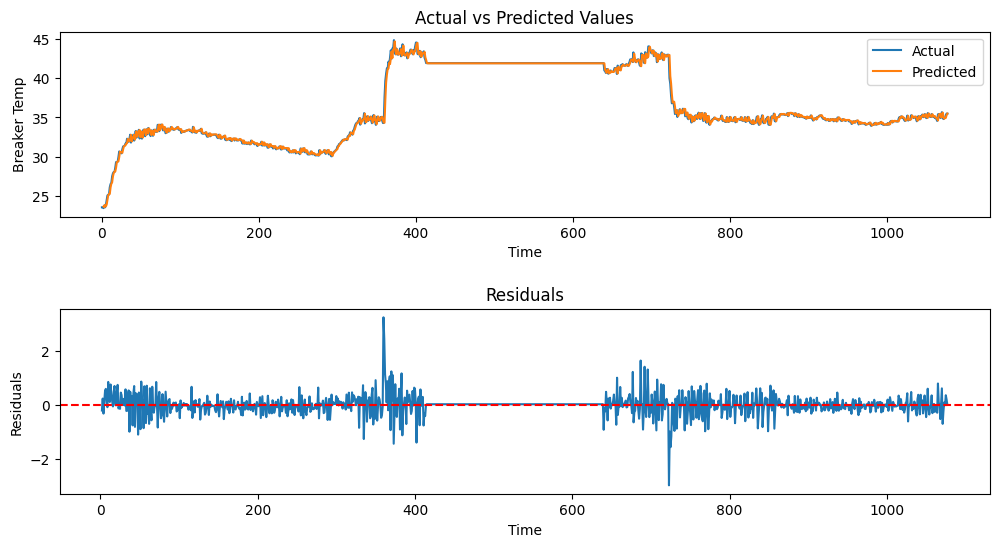

In [12]:
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg
import matplotlib.pyplot as plt

# Load your data into a pandas DataFrame
data = pd.read_csv('test_data/PanelData.csv')

# Assuming 'Breaker Temp' is the name of the column you want to predict
breaker_temp = data['Breaker Temp']

# Create an AutoReg model with a specified number of lags (e.g., 2)
model = AutoReg(breaker_temp, lags=2)

# Fit the model
model_fit = model.fit()

# Make predictions for the entire 'Breaker Temp' series
predictions = model_fit.predict(start=0, end=len(breaker_temp)-1)

# Compute the residuals (actual - predicted)
residuals = breaker_temp - predictions

# Plot the actual values, predicted values, and residuals
plt.figure(figsize=(12, 6))

# Plot the actual values
plt.subplot(2, 1, 1)
plt.plot(breaker_temp, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('Actual vs Predicted Values')
plt.xlabel('Time')
plt.ylabel('Breaker Temp')
plt.legend()

# Plot the residuals
plt.subplot(2, 1, 2)
plt.plot(residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals')
plt.xlabel('Time')
plt.ylabel('Residuals')

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5)

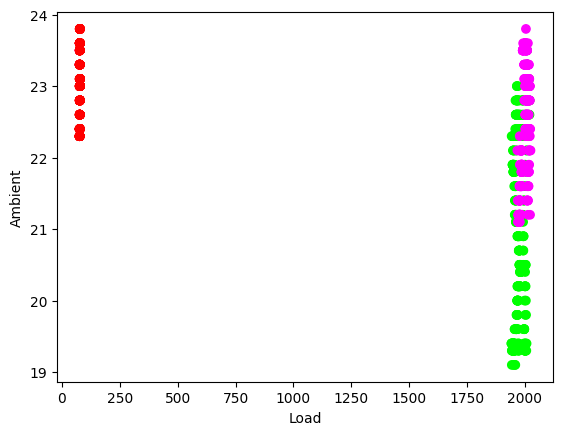

In [49]:
colors = {
    "100%": (0.0, 1.0, 0.0),
    "HEATER JUNCTION J2": (1.0,0,1.0),
    "HEATER SWITCHBOARD": (1.0,0.0,0.0)
}
colorList = [colors.get(col[0]) for col in data[['Anomaly']].to_numpy().tolist()]
X, y = data[['Load']].to_numpy().tolist(), data[['Ambient']].to_numpy().tolist()
plt.scatter(X,y,c=colorList)
plt.xlabel('Load')
plt.ylabel('Ambient')
plt.show()

Best N Neighors: 5


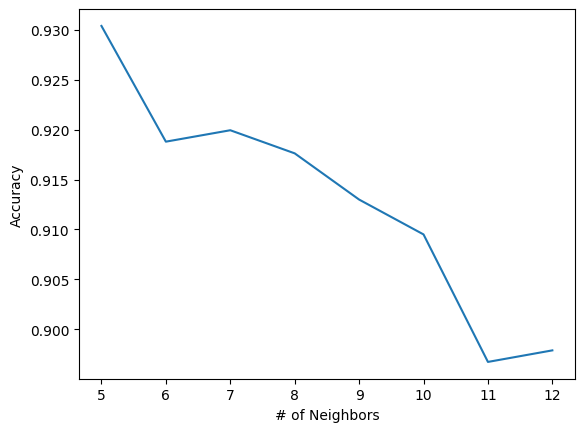

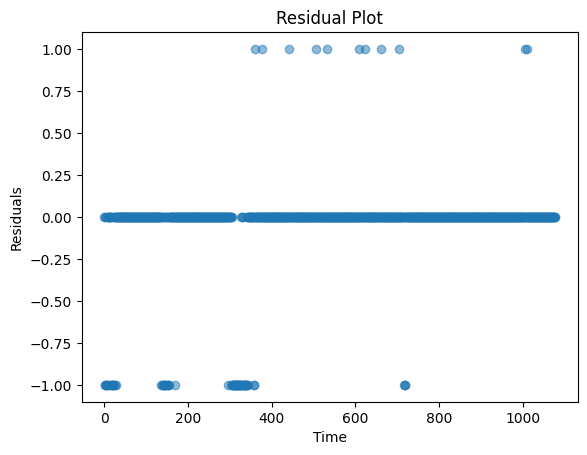

In [79]:
target_encoded = labelencoder.fit_transform(data['Anomaly'])
X_train, X_test, Y_train, Y_test = train_test_split(data[['Load','Ambient','Vibration']], target_encoded, test_size=0.2)
cross_value_scores = []

# Neighbors to test / X Axis
neighbors = [5,6,7,8,9,10,11,12]

for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, X_train, Y_train, cv=5)
    avg = np.mean(scores)
    cross_value_scores.append(avg)

best_n_neighbors = neighbors[np.argmax(cross_value_scores)]
print(f'Best N Neighors: {best_n_neighbors}')

# Plotting
fig, ax = plt.subplots()
plt.plot(neighbors,cross_value_scores)
plt.xlabel("# of Neighbors")
plt.ylabel("Accuracy")
plt.show()

model = KNeighborsClassifier(n_neighbors=best_n_neighbors)
model.fit(X_train,Y_train)

y_pred = model.predict(data[['Load','Ambient','Vibration']])
residuals = target_encoded - y_pred

plt.scatter(data[['TIME']].to_numpy().tolist(), residuals, alpha=0.5)  

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.title('Residual Plot')

# Show the plot
plt.show()


# DB SCAN